In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import MoS2_data_cleaning as mo
import find_SS as fs
import os
import re
import numpy as np
from scipy.ndimage import gaussian_filter1d



In [2]:
directory_path = "C:\\Users\\sophi\\Box\\MoS2Project\\2025-10-16-CVD-IdVtg"  # Replace with your directory path
if not os.path.isdir(f'{directory_path}\sorted'):
    os.mkdir(f'{directory_path}\sorted')
file_list = []
for filename in os.listdir(directory_path):
    file_path = os.path.join(directory_path, filename)
    if os.path.isfile(file_path):
        file_list.append(file_path)

In [3]:
filename = 'C:\\Users\\sophi\\Box\\MoS2Project\\2025-10-16-CVD-IdVtg\\R10C11-T__ExfoliatedMoS2_TGIdVg.csv'
df  = pd.read_csv(filename, skiprows=256)
df.drop(df.columns[0], axis=1, inplace=True)

Vbg = df.iloc[1, 2]
df.drop(columns=[' Vbg', ' IS'], inplace=True)




df.head()


,VTG,VD,ID,ITG,Ibg
0,-1.500,0.1,-2.015500e-10,-2.768000e-11,4.448600e-10
1,-1.485,0.1,-1.047800e-10,-2.647000e-11,4.197100e-10
2,-1.470,0.1,-1.086400e-10,-2.629000e-11,3.829700e-10
3,-1.455,0.1,-1.032200e-10,-2.390000e-11,3.304100e-10
4,-1.440,0.1,-9.877000e-11,-2.465000e-11,2.987500e-10


In [4]:
df[' forward'] = True

df.loc[(df.index >= 201) & (df.index <= 401), ' forward'] = False
df.loc[(df.index >= 603) & (df.index <= 803), ' forward'] = False
df.loc[(df.index >= 1005) & (df.index <= 1205), ' forward'] = False
df.loc[(df.index >= 1407) & (df.index <= 1607), ' forward'] = False

with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(df)

        VTG   VD            ID           ITG           Ibg  forward
0    -1.500  0.1 -2.015500e-10 -2.768000e-11  4.448600e-10     True
1    -1.485  0.1 -1.047800e-10 -2.647000e-11  4.197100e-10     True
2    -1.470  0.1 -1.086400e-10 -2.629000e-11  3.829700e-10     True
3    -1.455  0.1 -1.032200e-10 -2.390000e-11  3.304100e-10     True
4    -1.440  0.1 -9.877000e-11 -2.465000e-11  2.987500e-10     True
5    -1.425  0.1 -9.147000e-11 -2.250000e-11  2.563800e-10     True
6    -1.410  0.1 -9.428000e-11 -2.082000e-11  2.236100e-10     True
7    -1.395  0.1 -8.551000e-11 -2.548000e-11  2.173000e-10     True
8    -1.380  0.1 -8.641000e-11 -2.172000e-11  1.991000e-10     True
9    -1.365  0.1 -8.483000e-11 -2.023000e-11  1.846600e-10     True
10   -1.350  0.1 -7.867000e-11 -2.001000e-11  1.654400e-10     True
11   -1.335  0.1 -7.555000e-11 -1.951000e-11  1.493400e-10     True
12   -1.320  0.1 -7.405000e-11 -1.999000e-11  1.543900e-10     True
13   -1.305  0.1 -7.585000e-11 -1.931000e-11  1.

In [5]:
df_new = pd.pivot_table(df,columns=' VD',values=[' ID',' ITG',' Ibg'],index=[' VTG',' forward'])
df_new.columns

# df_sorted.to_csv('IdVd_sorted.csv', index=True)

MultiIndex([( ' ID', 0.1),
            ( ' ID', 0.4),
            ( ' ID', 0.7),
            ( ' ID', 1.0),
            (' ITG', 0.1),
            (' ITG', 0.4),
            (' ITG', 0.7),
            (' ITG', 1.0),
            (' Ibg', 0.1),
            (' Ibg', 0.4),
            (' Ibg', 0.7),
            (' Ibg', 1.0)],
           names=[None, ' VD'])

In [6]:
df_sorted = df_new.sort_values(by=[' forward',' VTG'])
df_sorted

ID                                            \
 VD                       0.1           0.4           0.7           1.0   
 VTG    forward                                                           
-1.500 False     3.550000e-12  5.020000e-12  1.065000e-11  1.418000e-11   
-1.485 False     2.440000e-12  4.340000e-12  9.970000e-12  1.666000e-11   
-1.470 False     3.490000e-12  4.130000e-12  1.195000e-11  1.525000e-11   
-1.455 False     3.370000e-12  5.990000e-12  9.950000e-12  1.547000e-11   
-1.440 False     8.700000e-13  3.180000e-12  1.152000e-11  1.619000e-11   
...                       ...           ...           ...           ...   
 1.440 True      1.443800e-07  5.316200e-07  9.092200e-07  1.268400e-06   
 1.455 True      1.451800e-07  5.297800e-07  9.077600e-07  1.275800e-06   
 1.470 True      1.420400e-07  5.333000e-07  9.160200e-07  1.278000e-06   
 1.485 True      1.447000e-07  5.337000e-07  9.127800e-07  1.278900e-06   
 1.500 True      1.463600e-07  5.380600e-07  9.241400e-07  1.307300e-06   

                          ITG                                            \
 VD                       0.1           0.4           0.7           1.0   
 VTG    forward                                                           
-1.500 False    -2.145000e-11 -2.334000e-11 -2.499000e-11 -2.145000e-11   
-1.485 False    -1.952000e-11 -2.346000e-11 -2.349000e-11 -2.285000e-11   
-1.470 False    -1.938000e-11 -2.140000e-11 -2.242000e-11 -2.108000e-11   
-1.455 False    -2.051000e-11 -2.388000e-11 -2.246000e-11 -2.089000e-11   
-1.440 False    -1.798000e-11 -1.985000e-11 -2.197000e-11 -2.179000e-11   
...                       ...           ...           ...           ...   
 1.440 True      3.008000e-10  1.635300e-10  6.621000e-11  4.317000e-11   
 1.455 True      3.209000e-10  1.659000e-10  6.698000e-11  4.693000e-11   
 1.470 True      3.499800e-10  1.715800e-10  7.535000e-11  4.786000e-11   
 1.485 True      4.109700e-10  1.839800e-10  8.530000e-11  5.330000e-11   
 1.500 True      3.805600e-10  2.019800e-10  1.025700e-10  6.052000e-11   

                          Ibg                                            
 VD                       0.1           0.4           0.7           1.0  
 VTG    forward                                                          
-1.500 False     4.960000e-12  2.740000e-12 -3.620000e-12 -7.640000e-12  
-1.485 False     4.830000e-12  2.660000e-12 -3.280000e-12 -7.320000e-12  
-1.470 False     4.750000e-12  3.350000e-12 -3.100000e-12 -8.940000e-12  
-1.455 False     4.310000e-12  3.950000e-12 -3.260000e-12 -7.050000e-12  
-1.440 False     3.640000e-12  3.430000e-12 -3.500000e-12 -7.820000e-12  
...                       ...           ...           ...           ...  
 1.440 True     -4.549000e-11 -1.928000e-11 -5.490000e-12 -1.453000e-11  
 1.455 True     -4.806000e-11 -1.898000e-11 -8.220000e-12 -9.880000e-12  
 1.470 True     -5.305000e-11 -1.997000e-11 -1.110000e-11 -1.117000e-11  
 1.485 True     -6.383000e-11 -2.410000e-11 -1.085000e-11 -1.176000e-11  
 1.500 True     -5.615000e-11 -3.928000e-11 -2.116000e-11 -8.160000e-12  

[402 rows x 12 columns]

In [7]:
midpoint = len(df_sorted) // 2

# Split the DataFrame into two halves
first_half = df_sorted.iloc[:midpoint]
second_half = df_sorted.iloc[midpoint:]

# Sort the first half in ascending order based on 'col1'
first_half_sorted = first_half.sort_values(by=' VTG', ascending=True)

# Sort the second half in descending order based on 'col1'
second_half_sorted = second_half.sort_values(by=' VTG', ascending=False)

# Concatenate the sorted halves back together
sorted_df = pd.concat([first_half_sorted, second_half_sorted])

print("\nSorted DataFrame (first half ascending, second half descending):")
sorted_df.head()


Sorted DataFrame (first half ascending, second half descending):


ID                                            \
 VD                       0.1           0.4           0.7           1.0   
 VTG    forward                                                           
-1.500 False     3.550000e-12  5.020000e-12  1.065000e-11  1.418000e-11   
-1.485 False     2.440000e-12  4.340000e-12  9.970000e-12  1.666000e-11   
-1.470 False     3.490000e-12  4.130000e-12  1.195000e-11  1.525000e-11   
-1.455 False     3.370000e-12  5.990000e-12  9.950000e-12  1.547000e-11   
-1.440 False     8.700000e-13  3.180000e-12  1.152000e-11  1.619000e-11   

                          ITG                                            \
 VD                       0.1           0.4           0.7           1.0   
 VTG    forward                                                           
-1.500 False    -2.145000e-11 -2.334000e-11 -2.499000e-11 -2.145000e-11   
-1.485 False    -1.952000e-11 -2.346000e-11 -2.349000e-11 -2.285000e-11   
-1.470 False    -1.938000e-11 -2.140000e-11 -2.242000e-11 -2.108000e-11   
-1.455 False    -2.051000e-11 -2.388000e-11 -2.246000e-11 -2.089000e-11   
-1.440 False    -1.798000e-11 -1.985000e-11 -2.197000e-11 -2.179000e-11   

                          Ibg                                            
 VD                       0.1           0.4           0.7           1.0  
 VTG    forward                                                          
-1.500 False     4.960000e-12  2.740000e-12 -3.620000e-12 -7.640000e-12  
-1.485 False     4.830000e-12  2.660000e-12 -3.280000e-12 -7.320000e-12  
-1.470 False     4.750000e-12  3.350000e-12 -3.100000e-12 -8.940000e-12  
-1.455 False     4.310000e-12  3.950000e-12 -3.260000e-12 -7.050000e-12  
-1.440 False     3.640000e-12  3.430000e-12 -3.500000e-12 -7.820000e-12

In [8]:
column_names_list = sorted_df.columns.tolist()
column_names_list

[(' ID', 0.1),
 (' ID', 0.4),
 (' ID', 0.7),
 (' ID', 1.0),
 (' ITG', 0.1),
 (' ITG', 0.4),
 (' ITG', 0.7),
 (' ITG', 1.0),
 (' Ibg', 0.1),
 (' Ibg', 0.4),
 (' Ibg', 0.7),
 (' Ibg', 1.0)]

In [9]:
new_list = []
for tup in column_names_list[0:4]:
    new_list.append(f'Id, V_D = {tup[1]}')
for tup in column_names_list[4:8]:
    new_list.append(f'Itg, V_D = {tup[1]}')
for tup in column_names_list[8:]:
    new_list.append(f'Ibg, V_D = {tup[1]}')



sorted_df.columns = new_list
sorted_df

Id, V_D = 0.1  Id, V_D = 0.4  Id, V_D = 0.7  Id, V_D = 1.0  \
 VTG    forward                                                               
-1.500 False      3.550000e-12   5.020000e-12   1.065000e-11   1.418000e-11   
-1.485 False      2.440000e-12   4.340000e-12   9.970000e-12   1.666000e-11   
-1.470 False      3.490000e-12   4.130000e-12   1.195000e-11   1.525000e-11   
-1.455 False      3.370000e-12   5.990000e-12   9.950000e-12   1.547000e-11   
-1.440 False      8.700000e-13   3.180000e-12   1.152000e-11   1.619000e-11   
...                        ...            ...            ...            ...   
       True      -9.877000e-11   8.568000e-11   5.611000e-11   1.744000e-11   
-1.455 True      -1.032200e-10   9.197000e-11   6.173000e-11   1.799000e-11   
-1.470 True      -1.086400e-10   9.362000e-11   6.279000e-11   1.589000e-11   
-1.485 True      -1.047800e-10   9.848000e-11   6.789000e-11   1.817000e-11   
-1.500 True      -2.015500e-10   1.317300e-10   9.862000e-11   2.079000e-11   

                 Itg, V_D = 0.1  Itg, V_D = 0.4  Itg, V_D = 0.7  \
 VTG    forward                                                   
-1.500 False      -2.145000e-11   -2.334000e-11   -2.499000e-11   
-1.485 False      -1.952000e-11   -2.346000e-11   -2.349000e-11   
-1.470 False      -1.938000e-11   -2.140000e-11   -2.242000e-11   
-1.455 False      -2.051000e-11   -2.388000e-11   -2.246000e-11   
-1.440 False      -1.798000e-11   -1.985000e-11   -2.197000e-11   
...                         ...             ...             ...   
       True       -2.465000e-11   -1.866000e-11   -1.946000e-11   
-1.455 True       -2.390000e-11   -2.025000e-11   -2.376000e-11   
-1.470 True       -2.629000e-11   -1.830000e-11   -2.247000e-11   
-1.485 True       -2.647000e-11   -2.052000e-11   -2.261000e-11   
-1.500 True       -2.768000e-11   -2.028000e-11   -2.418000e-11   

                 Itg, V_D = 1.0  Ibg, V_D = 0.1  Ibg, V_D = 0.4  \
 VTG    forward                                                   
-1.500 False      -2.145000e-11    4.960000e-12    2.740000e-12   
-1.485 False      -2.285000e-11    4.830000e-12    2.660000e-12   
-1.470 False      -2.108000e-11    4.750000e-12    3.350000e-12   
-1.455 False      -2.089000e-11    4.310000e-12    3.950000e-12   
-1.440 False      -2.179000e-11    3.640000e-12    3.430000e-12   
...                         ...             ...             ...   
       True       -2.153000e-11    2.987500e-10   -7.889000e-11   
-1.455 True       -2.357000e-11    3.304100e-10   -8.315000e-11   
-1.470 True       -1.905000e-11    3.829700e-10   -8.760000e-11   
-1.485 True       -2.264000e-11    4.197100e-10   -9.058000e-11   
-1.500 True       -2.217000e-11    4.448600e-10   -9.549000e-11   

                 Ibg, V_D = 0.7  Ibg, V_D = 1.0  
 VTG    forward                                  
-1.500 False      -3.620000e-12   -7.640000e-12  
-1.485 False      -3.280000e-12   -7.320000e-12  
-1.470 False      -3.100000e-12   -8.940000e-12  
-1.455 False      -3.260000e-12   -7.050000e-12  
-1.440 False      -3.500000e-12   -7.820000e-12  
...                         ...             ...  
       True       -5.099000e-11   -9.070000e-12  
-1.455 True       -5.140000e-11   -9.540000e-12  
-1.470 True       -5.470000e-11   -1.030000e-11  
-1.485 True       -5.824000e-11   -8.440000e-12  
-1.500 True       -6.307000e-11   -9.680000e-12  

[402 rows x 12 columns]

In [10]:

df_new = sorted_df.reset_index().set_index(' VTG')
df_new['Id, V_D = 0.1'] = abs(df_new['Id, V_D = 0.1'])
df_new['Itg, V_D = 0.1'] = abs(df_new['Itg, V_D = 0.1'])
df_new.drop(columns=[' forward', 'Itg, V_D = 0.4', 'Itg, V_D = 0.7', 'Itg, V_D = 1.0','Ibg, V_D = 0.4', 'Ibg, V_D = 0.7', 'Ibg, V_D = 1.0'],inplace=True)
df_new[' Vbg'] = Vbg
df_new.columns

Index(['Id, V_D = 0.1', 'Id, V_D = 0.4', 'Id, V_D = 0.7', 'Id, V_D = 1.0',
       'Itg, V_D = 0.1', 'Ibg, V_D = 0.1', ' Vbg'],
      dtype='object')

In [11]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(df_new)

        Id, V_D = 0.1  Id, V_D = 0.4  Id, V_D = 0.7  Id, V_D = 1.0  \
 VTG                                                                 
-1.500   3.550000e-12   5.020000e-12   1.065000e-11   1.418000e-11   
-1.485   2.440000e-12   4.340000e-12   9.970000e-12   1.666000e-11   
-1.470   3.490000e-12   4.130000e-12   1.195000e-11   1.525000e-11   
-1.455   3.370000e-12   5.990000e-12   9.950000e-12   1.547000e-11   
-1.440   8.700000e-13   3.180000e-12   1.152000e-11   1.619000e-11   
-1.425   3.720000e-12   5.240000e-12   1.097000e-11   1.435000e-11   
-1.410   1.920000e-12   4.510000e-12   9.570000e-12   1.597000e-11   
-1.395   3.210000e-12   3.360000e-12   1.231000e-11   1.574000e-11   
-1.380   3.270000e-12   6.050000e-12   1.091000e-11   1.592000e-11   
-1.365   1.160000e-12   4.010000e-12   1.190000e-11   1.685000e-11   
-1.350   3.280000e-12   5.110000e-12   1.178000e-11   1.514000e-11   
-1.335   1.960000e-12   4.650000e-12   1.015000e-11   1.674000e-11   
-1.320   2.420000e-1

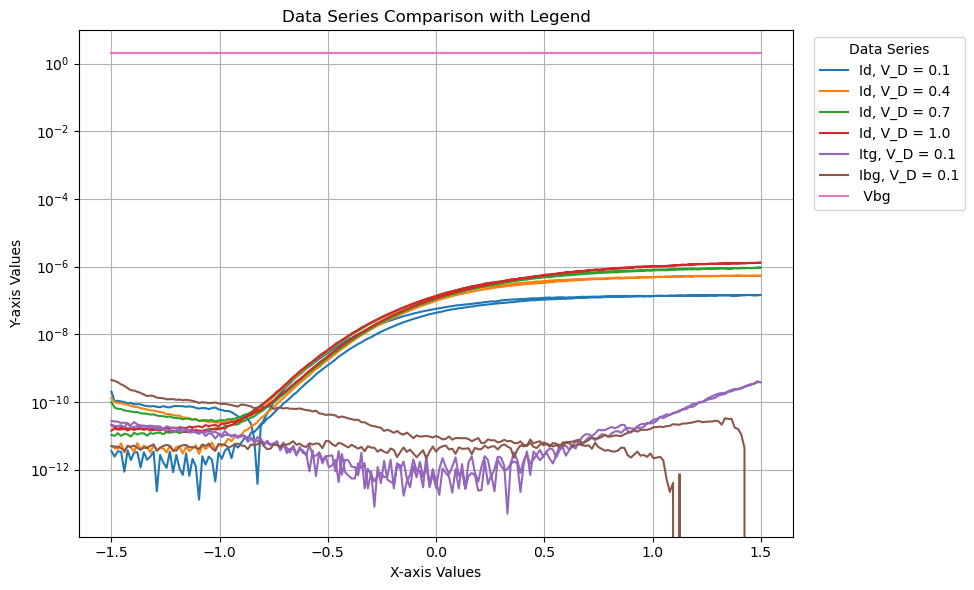

In [12]:
ax = df_new.plot(kind='line', figsize=(10, 6))

# 3. Add labels and title
plt.title('Data Series Comparison with Legend')
plt.xlabel('X-axis Values')
plt.ylabel('Y-axis Values')
plt.yscale('log')

# 4. Customize and display the legend
plt.legend(title='Data Series', loc='upper right', bbox_to_anchor=(1.25, 1)) # Example of placing legend outside
plt.grid(True)
plt.tight_layout() # Adjust layout to prevent labels/legend from overlapping
plt.show()

In [18]:
filtered_df = df_new[df_new['Id, V_D = 0.1'] > 1e-12]
print(filtered_df)

        Id, V_D = 0.1  Id, V_D = 0.4  Id, V_D = 0.7  Id, V_D = 1.0  \
 VTG                                                                 
-1.500   3.550000e-12   5.020000e-12   1.065000e-11   1.418000e-11   
-1.485   2.440000e-12   4.340000e-12   9.970000e-12   1.666000e-11   
-1.470   3.490000e-12   4.130000e-12   1.195000e-11   1.525000e-11   
-1.455   3.370000e-12   5.990000e-12   9.950000e-12   1.547000e-11   
-1.425   3.720000e-12   5.240000e-12   1.097000e-11   1.435000e-11   
...               ...            ...            ...            ...   
-1.440   9.877000e-11   8.568000e-11   5.611000e-11   1.744000e-11   
-1.455   1.032200e-10   9.197000e-11   6.173000e-11   1.799000e-11   
-1.470   1.086400e-10   9.362000e-11   6.279000e-11   1.589000e-11   
-1.485   1.047800e-10   9.848000e-11   6.789000e-11   1.817000e-11   
-1.500   2.015500e-10   1.317300e-10   9.862000e-11   2.079000e-11   

        Itg, V_D = 0.1  Ibg, V_D = 0.1   Vbg  
 VTG                                      

In [24]:
Vtg = filtered_df.index.to_numpy()
Id_sample = filtered_df['Id, V_D = 0.1'].to_numpy()


In [20]:
def find_first_Id_above_threshold(data_list, threshold):
    try:
        return next(index for index, value in enumerate(data_list) if value > threshold)
    except StopIteration:
        return -1

In [25]:
sigma = 5 # Standard deviation of the Gaussian kernel
smoothed_Id = gaussian_filter1d(Id_sample, sigma)

In [26]:
Id_idx_small = find_first_Id_above_threshold(smoothed_Id,1e-10)
print(f'Vtg = {Vtg[Id_idx_small]}, Id = {smoothed_Id[Id_idx_small]}')
Id_idx_large = find_first_Id_above_threshold(smoothed_Id,1e-9)
print(f'Vtg = {Vtg[Id_idx_large]}, Id = {smoothed_Id[Id_idx_large]}')

Vtg = -0.72, Id = 1.1716510087282215e-10
Vtg = -0.54, Id = 1.0695522714628984e-09


c:\Users\sophi\anaconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:1307: RuntimeWarning: divide by zero encountered in divide
  a = -(dx2)/(dx1 * (dx1 + dx2))
c:\Users\sophi\anaconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:1308: RuntimeWarning: divide by zero encountered in divide
  b = (dx2 - dx1) / (dx1 * dx2)
c:\Users\sophi\anaconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:1309: RuntimeWarning: divide by zero encountered in divide
  c = dx1 / (dx2 * (dx1 + dx2))
c:\Users\sophi\anaconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:1315: RuntimeWarning: invalid value encountered in add
  out[tuple(slice1)] = a * f[tuple(slice2)] + b * f[tuple(slice3)] + c * f[tuple(slice4)]


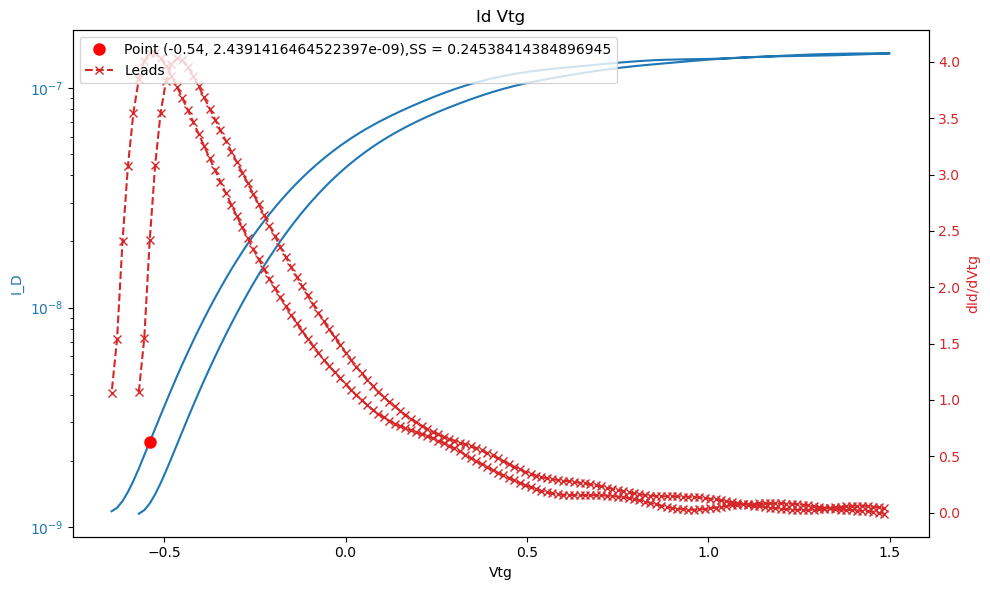

In [ ]:

dIdVg = np.gradient(np.log10(smoothed_Id),Vtg)
max_index = np.nanargmax(dIdVg)



fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot the first dataset on the primary axis
color = 'tab:blue'
ax1.set_xlabel('Vtg')
ax1.set_ylabel('I_D', color=color)
ax1.plot(Vtg,smoothed_Id)
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_yscale('log')
ax1.plot(Vtg[max_index], smoothed_Id[max_index], 'o', markersize=8, color='red', label=f'Point ({Vtg[max_index]}, {smoothed_Id[max_index]}),SS = {1/max(dIdVg)}')


# Create a second set of axes that shares the same x-axis
ax2 = ax1.twinx()

# Plot the second dataset on the secondary axis
color = 'tab:red'
ax2.set_ylabel('dId/dVtg', color=color)
ax2.plot(Vtg,dIdVg, color=color, marker='x', linestyle='--', label='Leads')
ax2.tick_params(axis='y', labelcolor=color)
#ax2.set_ylim(-1e9,1e9)

# Add a title and legend
plt.title('Id Vtg')
fig.tight_layout() # Adjusts plot to ensure everything fits

# To combine the legends from both axes
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax2.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper left')

plt.show()

In [14]:
SS = 1/max(dIdVg)
Vtg_ss = Vtg[np.nanargmax(dIdVg)]

In [15]:
arr1 = np.array([10, 12, 14, 11, 5])
np.argmax(arr1)

np.int64(2)

In [3]:
for file in file_list:
    print(f'{file} started')
    
    Vbg,df = mo.read_csv_IdVtg(file)
    df_reshaped = mo.reshape_table_by_VG(df)
    df_sorted = mo.reorder_by_VG(df_reshaped,Vbg)

    filename =directory_path + '\\sorted\\' + file[52:]
    df_sorted.to_csv(filename, index=True)

C:\Users\sophi\Box\MoS2Project\2025-10-16-CVD-IdVtg\R10C1-T__ExfoliatedMoS2_TGIdVg.csv started
C:\Users\sophi\Box\MoS2Project\2025-10-16-CVD-IdVtg\R10C10-T__ExfoliatedMoS2_TGIdVg.csv started
C:\Users\sophi\Box\MoS2Project\2025-10-16-CVD-IdVtg\R10C11-B__ExfoliatedMoS2_TGIdVg.csv started
C:\Users\sophi\Box\MoS2Project\2025-10-16-CVD-IdVtg\R10C11-T__ExfoliatedMoS2_TGIdVg.csv started
C:\Users\sophi\Box\MoS2Project\2025-10-16-CVD-IdVtg\R10C12-B__ExfoliatedMoS2_TGIdVg.csv started
C:\Users\sophi\Box\MoS2Project\2025-10-16-CVD-IdVtg\R10C12-T__ExfoliatedMoS2_TGIdVg.csv started
C:\Users\sophi\Box\MoS2Project\2025-10-16-CVD-IdVtg\R10C2-Left-B__ExfoliatedMoS2_TGIdVg.csv started
C:\Users\sophi\Box\MoS2Project\2025-10-16-CVD-IdVtg\R10C2-Left-T__ExfoliatedMoS2_TGIdVg.csv started
C:\Users\sophi\Box\MoS2Project\2025-10-16-CVD-IdVtg\R10C3-B__ExfoliatedMoS2_TGIdVg-2.csv started
C:\Users\sophi\Box\MoS2Project\2025-10-16-CVD-IdVtg\R10C3-B__ExfoliatedMoS2_TGIdVg.csv started
C:\Users\sophi\Box\MoS2Project\20

In [3]:
SS_list = []
name_list = []
Vtg_upper_list = []
Vtg_lower_list = []
Id_upper_list = []
Id_lower_list = []

for file in file_list:
    print(f'SS: {file} started')
    name_list.append(file[52:])
    
    Vbg,df = mo.read_csv_IdVtg(file)
    df_reshaped = mo.reshape_table_by_VG(df)
    df_sorted = mo.reorder_by_VG(df_reshaped,Vbg)
    df_filtered = fs.filter_noise(df_sorted)
    Vtg, smoothed_Id = fs.grab_V_I_0pt1(df_filtered)
    SS,idx_large,idx_small = fs.find_SS(Vtg,smoothed_Id)
    print(SS)
    SS_list.append(SS)
    Vtg_upper_list.append(Vtg[idx_large])
    Vtg_lower_list.append(Vtg[idx_small])
    Id_upper_list.append(smoothed_Id[idx_large])
    Id_lower_list.append(smoothed_Id[idx_small])

    

    


SS: C:\Users\sophi\Box\MoS2Project\2025-10-16-CVD-IdVtg\R10C1-T__ExfoliatedMoS2_TGIdVg.csv started
Vtg = -0.54, Id = 1.1398436162350359e-10
Vtg = -0.375, Id = 1.029931320052996e-09
0.16500000000000004
SS: C:\Users\sophi\Box\MoS2Project\2025-10-16-CVD-IdVtg\R10C10-T__ExfoliatedMoS2_TGIdVg.csv started
Vtg = -1.5, Id = 4.0064654505296724e-10
Vtg = -0.165, Id = 1.0952025337826155e-09
1.335
SS: C:\Users\sophi\Box\MoS2Project\2025-10-16-CVD-IdVtg\R10C11-B__ExfoliatedMoS2_TGIdVg.csv started
Vtg = -0.27, Id = 1.0926292119180503e-10
Vtg = -0.075, Id = 1.114628315576858e-09
0.195
SS: C:\Users\sophi\Box\MoS2Project\2025-10-16-CVD-IdVtg\R10C11-T__ExfoliatedMoS2_TGIdVg.csv started
Vtg = -0.75, Id = 1.1852147846706353e-10
Vtg = -0.57, Id = 1.115232547511141e-09
0.18000000000000005
SS: C:\Users\sophi\Box\MoS2Project\2025-10-16-CVD-IdVtg\R10C12-B__ExfoliatedMoS2_TGIdVg.csv started
Vtg = -0.27, Id = 1.11366815452839e-10
Vtg = -0.075, Id = 1.1323961665782858e-09
0.195
SS: C:\Users\sophi\Box\MoS2Project\

EmptyDataError: No columns to parse from file

In [4]:
SS_df = pd.DataFrame(list(zip(name_list, SS_list,Vtg_upper_list,Vtg_lower_list,Id_upper_list,Id_lower_list)), columns=['filename', 'SS','Vtg_high','Vtg_low','Id_high','Id_low'])
SS_df.to_csv(f"{directory_path}\\SS_per_file_1_threshold.csv", index=False)